Task1_0531. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1전처리
# 결측값 처리
# df = df.replace('?', np.nan)
# df['horsepower'] = df['horsepower'].astype(float)
# df = df.dropna()
# df = df.astype({'horsepower': 'float64'})
file_path = '/content/drive/MyDrive/dataset/auto-mpg.csv'


df = pd.read_csv(file_path)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
df.drop('car name', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model year  origin
9.0   8          304.0         193         4732    18.5          70          1         1
27.0  4          151.0         90          2950    17.3          82          1         1
                 140.0         86          2790    15.6          82          1         1
                 112.0         88          2640    18.6          82          1         1
                 101.0         83          2202    15.3          76          2         1
                                                                                      ..
18.6  6          225.0         110         3620    18.7          78          1         1
18.5  8          360.0         150         3940    13.0          79          1         1
      6          250.0         98          3525    19.0          77          1         1
                               110         3645    16.2          76          1         1
46.6  4          86.0     

In [ ]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [ ]:
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()
df = df.astype({'horsepower': 'float64'})

<Axes: >

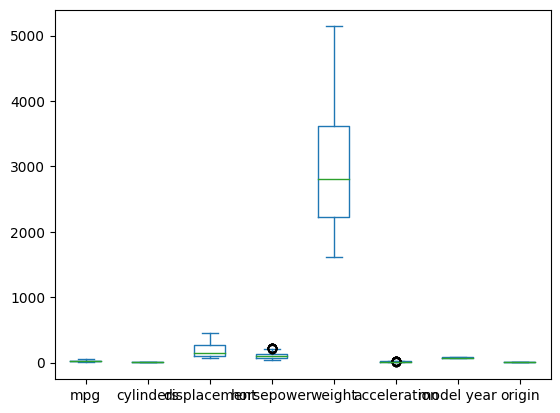

In [ ]:
df.plot.box()

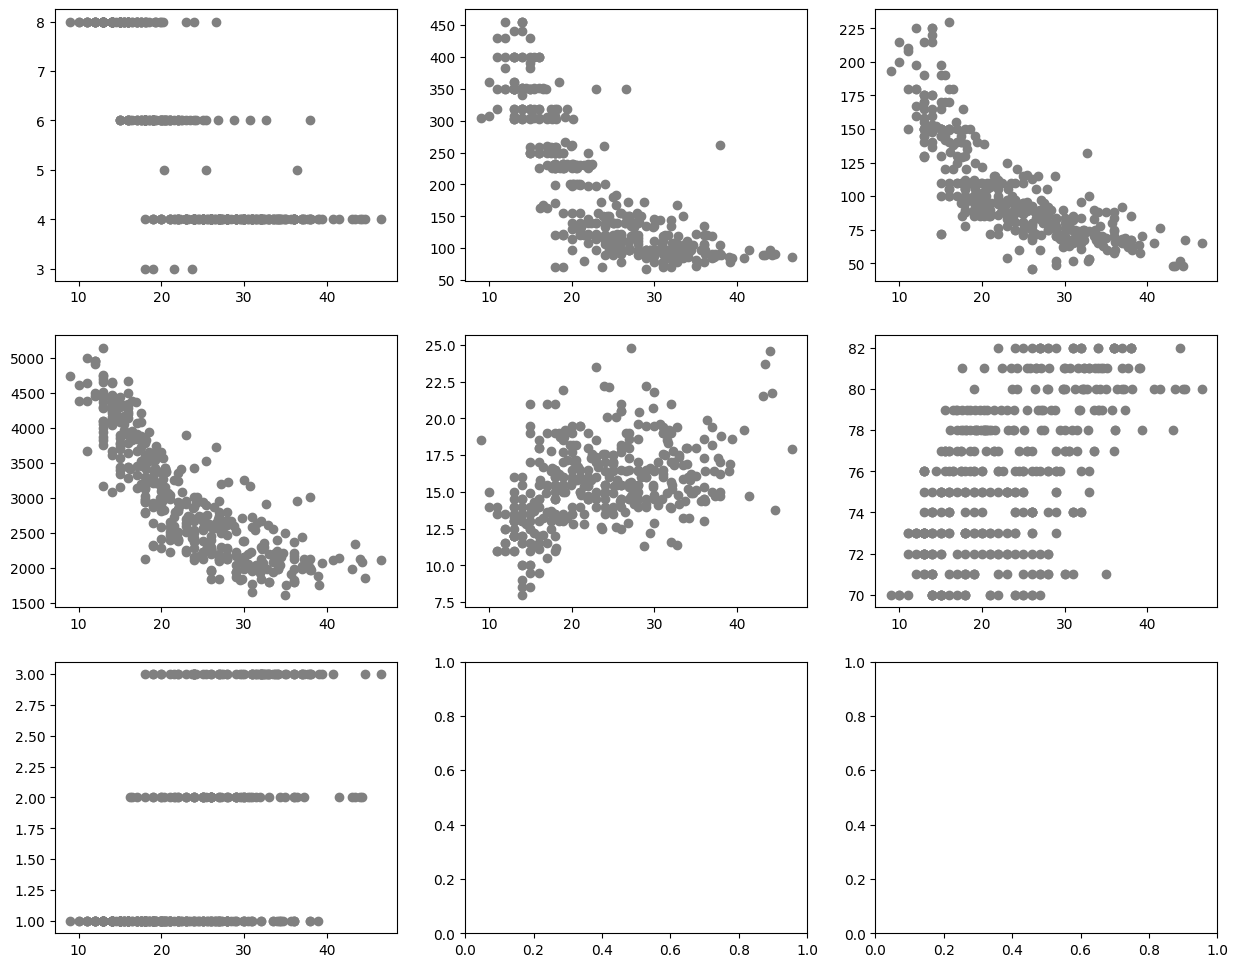

In [ ]:
figm, axs = plt.subplots(3,3, figsize = (15,12))

axs[0,0].scatter(df['mpg'],df['cylinders'], color = 'gray')
axs[0,1].scatter(df['mpg'],df['displacement'], color = 'gray')
axs[0,2].scatter(df['mpg'],df['horsepower'], color = 'gray')
axs[1,0].scatter(df['mpg'],df['weight'], color = 'gray')
axs[1,1].scatter(df['mpg'],df['acceleration'], color = 'gray')
axs[1,2].scatter(df['mpg'],df['model year'], color = 'gray')
axs[2,0].scatter(df['mpg'],df['origin'], color = 'gray')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


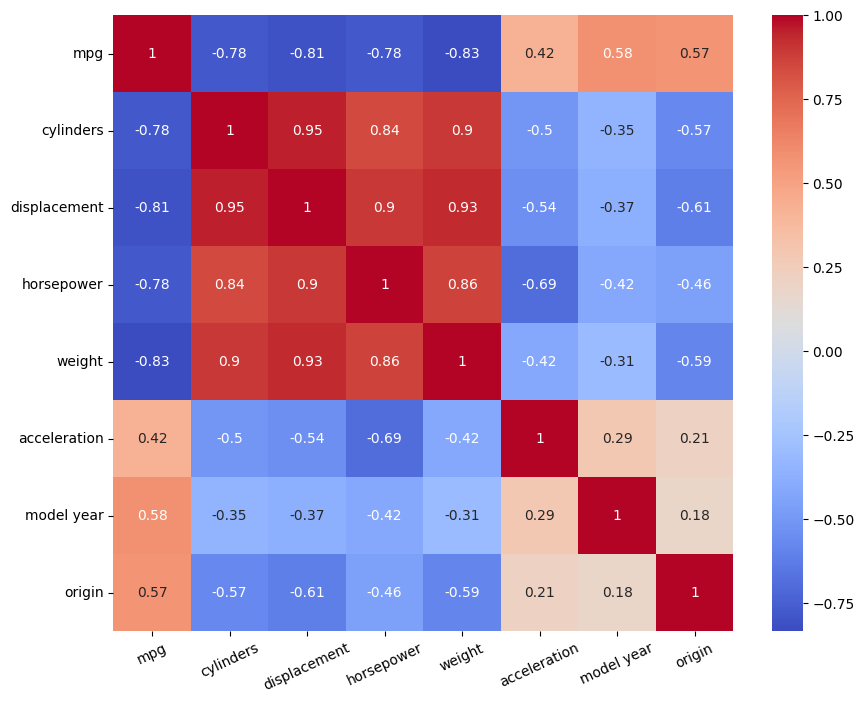

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation = 25)
plt.show()

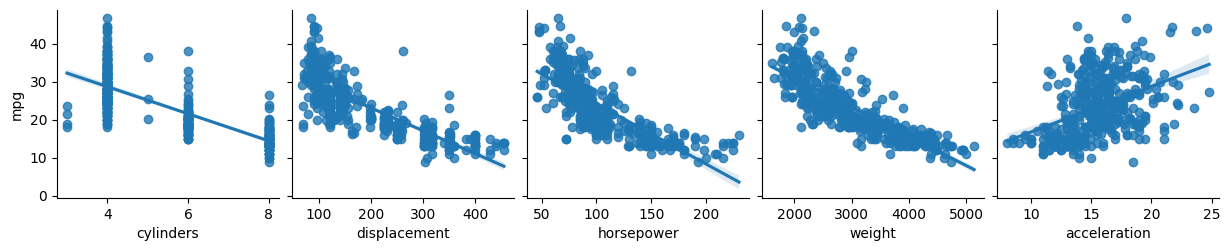

In [ ]:
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], y_vars= 'mpg', kind= 'reg')
plt.show()

In [ ]:
scaled_df = df[['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
target_variable = 'mpg'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 17.94
Root Mean Squared Error: 4.24
R-squared: 0.65
